In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn

In [2]:
income = pd.read_csv('../data/income-data/income-clean.csv')
sentiment = pd.read_csv('../data/sentiment_score.csv')

In [3]:
income = income[income['Statistics'] == 'Median income (excluding zeros)']

In [4]:
income_1 = income.drop(columns=['Age group', 'REF_DATE', 'Sex', 'Income source', 'Statistics', 'Unnamed: 0'])

In [5]:
sentiment

,subreddit,year,score
0,Manitoba,2016,0.454037
1,Manitoba,2017,0.412312
2,Manitoba,2018,0.430043
3,Manitoba,2019,0.494603
4,Manitoba,2020,0.389236
...,...,...,...
91,saskatchewan,2019,0.319478
92,saskatchewan,2020,0.315896
93,saskatchewan,2021,0.298976
94,saskatchewan,2022,0.298894


In [6]:
sentiment_clean = sentiment[sentiment['year'] == 2022]

In [7]:
sentiment_clean = sentiment_clean.rename(columns={"subreddit":'GEO'})

In [8]:
sentiment_clean.loc[sentiment_clean['GEO'] == "NovaScotia", "GEO"] = 'Nova Scotia'
sentiment_clean.loc[sentiment_clean['GEO'] == "PEI", "GEO"] = 'Prince Edward Island'
sentiment_clean.loc[sentiment_clean['GEO'] == "alberta", "GEO"] = 'Alberta'
sentiment_clean.loc[sentiment_clean['GEO'] == "britishcolumbia", "GEO"] = 'British Columbia'
sentiment_clean.loc[sentiment_clean['GEO'] == "newbrunswickcanada", "GEO"] = 'New Brunswick'
sentiment_clean.loc[sentiment_clean['GEO'] == "newfoundland", "GEO"] = 'Newfoundland and Labrador'
sentiment_clean.loc[sentiment_clean['GEO'] == "ontario", "GEO"] = 'Ontario'
sentiment_clean.loc[sentiment_clean['GEO'] == "saskatchewan", "GEO"] = 'Saskatchewan'

In [9]:
sentiment_clean = sentiment_clean[sentiment_clean['GEO'] != 'NWT']
sentiment_clean = sentiment_clean[sentiment_clean['GEO'] != 'Yukon']
sentiment_clean = sentiment_clean[sentiment_clean['GEO'] != 'nunavut']

In [10]:
merged = pd.merge(sentiment_clean, income_1, on='GEO')

In [11]:
merged = merged.rename(columns={"score": "Sentiment Score"})

In [12]:
merged

,GEO,year,Sentiment Score,VALUE
0,Manitoba,2022,0.342205,41100
1,Nova Scotia,2022,0.387696,38700
2,Prince Edward Island,2022,0.365866,40900
3,Alberta,2022,0.306322,45200
4,British Columbia,2022,0.323016,43900
5,New Brunswick,2022,0.331267,40100
6,Newfoundland and Labrador,2022,0.345304,39100
7,Ontario,2022,0.246919,42700
8,Saskatchewan,2022,0.298894,43900


In [13]:
line = stats.linregress(merged['Sentiment Score'], merged['VALUE'])

In [14]:
merged['prediction'] = line.intercept + line.slope*merged['Sentiment Score']

In [15]:
merged

,GEO,year,Sentiment Score,VALUE,prediction
0,Manitoba,2022,0.342205,41100,41185.600002
1,Nova Scotia,2022,0.387696,38700,39491.387764
2,Prince Edward Island,2022,0.365866,40900,40304.408889
3,Alberta,2022,0.306322,45200,42522.033626
4,British Columbia,2022,0.323016,43900,41900.277093
5,New Brunswick,2022,0.331267,40100,41593.004139
6,Newfoundland and Labrador,2022,0.345304,39100,41070.212037
7,Ontario,2022,0.246919,42700,44734.390684
8,Saskatchewan,2022,0.298894,43900,42798.685765


In [16]:
line

LinregressResult(slope=-37243.4783523277, intercept=53930.523050551186, rvalue=-0.6639174791161782, pvalue=0.051166284549207304, stderr=15855.354899944163, intercept_stderr=5228.586225463731)

<Figure size 640x480 with 0 Axes>

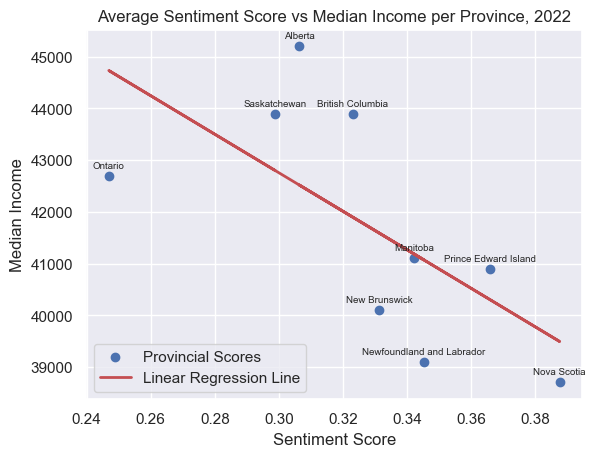

In [17]:
seaborn.set()
plt.figure()
fig, ax = plt.subplots()
ax.scatter(merged['Sentiment Score'], merged['VALUE'])
for i, province in enumerate(merged['GEO']):
    ax.text(merged['Sentiment Score'][i], merged['VALUE'][i] + 150, province, fontsize=7, ha='center')
ax.set_title('Average Sentiment Score vs Median Income per Province, 2022')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Median Income')
ax.plot(merged['Sentiment Score'], merged['prediction'], 'r-', linewidth=2)
ax.legend(['Provincial Scores', 'Linear Regression Line'], loc='lower left')
plt.savefig('../plots/sentiment_vs_income')